In [2]:
import os, math
import numpy as np
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style
%matplotlib inline
style.use('ggplot')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
              


In [3]:
def KBpriceindex_preprocessing(path, sheet_name):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # sheet_name : 매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bignames_list = bignames.split(' ')

    wb = xw.Book(path)
    sheet = wb.sheets['매매종합']
    row_num = sheet.range(1,1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
    for id, name in enumerate(small_col):
        if name == None:
            small_col[id] = big_col[id]

        check = id
        while True:
            if big_col[check] in bignames_list:
                big_col[id] = big_col[check]
                break
            else:
                check = check-1
            
    big_col[129:131] = '경기', '경기'
    small_col[185] ='서귀포'
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0, 1])
    
    index_list = list(new_col_data['구분']['구분'])
    new_index = []

    for id, idx in enumerate(index_list):
        temp = str(idx).split('.')
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.'+temp[1])
        else:
            new_index.append(new_index[id-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    Cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return Cleaned_data   

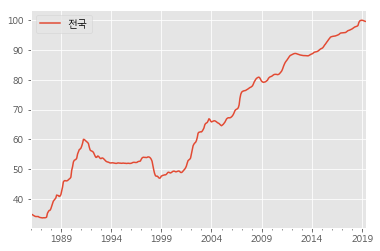

,서울,강북,강북구,광진구,노원구,도봉구,동대문구,마포구,서대문구,성동구,...,강동구,강서구,관악구,구로구,금천구,동작구,서초구,송파구,양천구,영등포구
1986-01-01,30.0438,41.94,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-02-01,30.0438,41.8891,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-03-01,30.0024,41.8891,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-04-01,29.8366,41.7366,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-05-01,29.588,41.2791,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-06-01,29.3808,41.2791,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-07-01,29.2979,41.2283,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-08-01,29.2979,41.2283,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-09-01,29.2979,41.2283,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986-10-01,29.1736,41.0758,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [16]:
path = 'data\monthly_price.xls'
if os.path.exists(path) is False:
    print(' Cannot fine the file!!')
    exit()

sheet_name = '매매종합'
saling_data = KBpriceindex_preprocessing(path, sheet_name)
saling_data['전국']['전국'].plot(legend='전국')
seoul_data = saling_data['서울']
plt.show()
display(seoul_data)


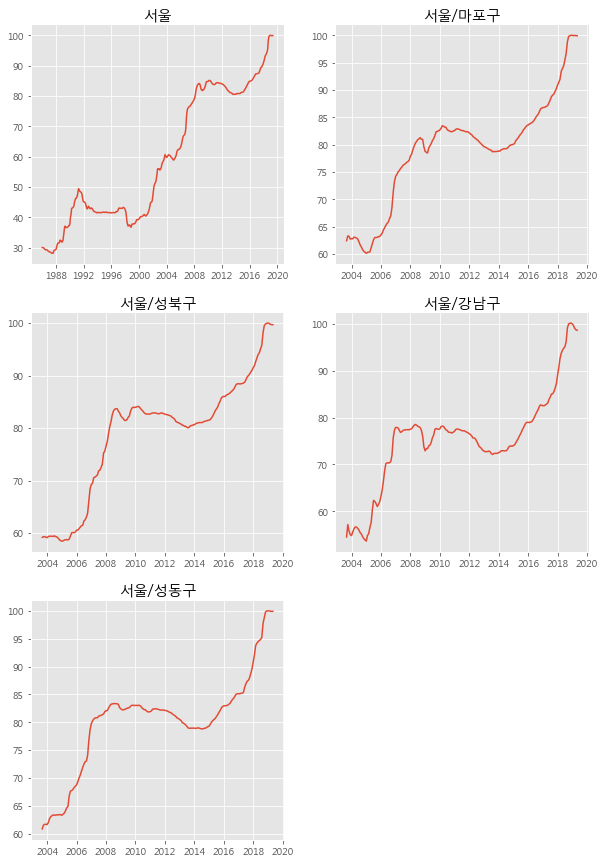

In [5]:
# 매매 가격지수 그래프
def Spots_drawing(datas, spot_list, s_date='1986-1-1'):
    # datas : DataFrame
    # spot_list : ['서울', '서울/마포구', '서울/성북구', '서울/강남구', '서울/성동구']
    # s_data : 시작 년도
    num_row = int(math.ceil(len(spot_list) / 2.0))
    plt.figure(figsize=(10, num_row*5))
    for i, spot in enumerate(spot_list):
        plt.subplot(num_row, 2, i+1)
        plt.title(spot)
        if '/' in spot:
            si, gu = spot.split('/')
        else:
            si = gu = spot
        plt.plot(datas[si][gu][s_date:])
    plt.show()
    
spot_list = ['서울', '서울/마포구', '서울/성북구', '서울/강남구', '서울/성동구']
Spots_drawing(saling_data, spot_list)

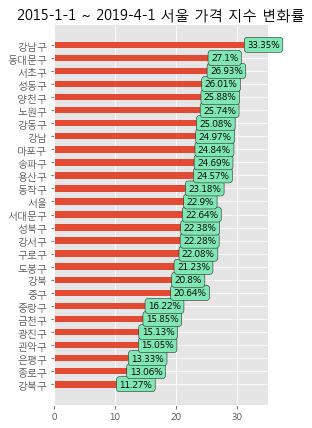

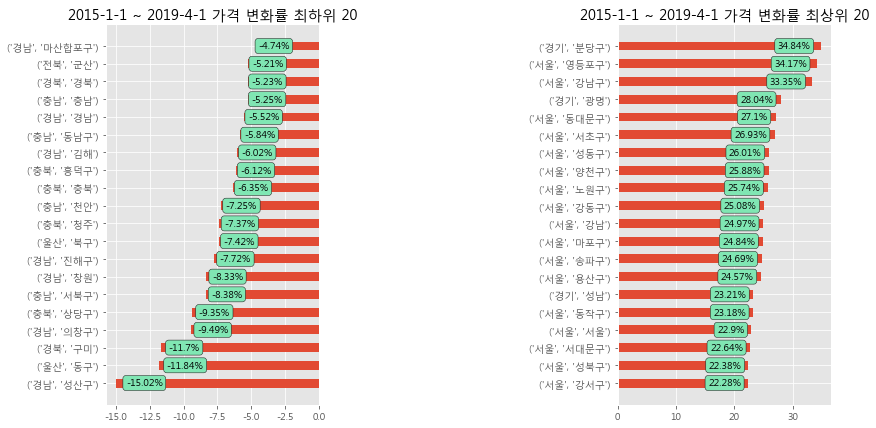

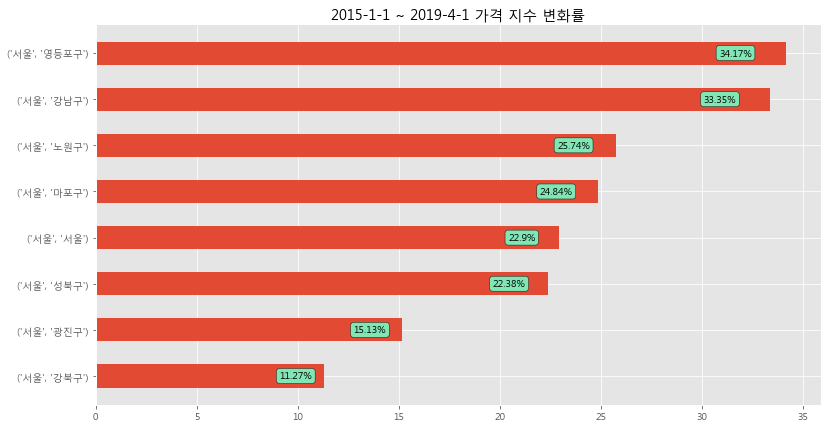

In [20]:
# 가격 지수 증감률
def show_price_rate(datas, duration):
    start_data = datas.loc[duration[0]]
    end_data = datas.loc[duration[1]]
    diff = ((end_data - start_data) / start_data * 100).dropna()
    fig = plt.figure(figsize=(13, 7))
    ind = np.arange(20)
    ax = fig.add_subplot(1, 3, 1)
    plt.title(duration[0]+' ~ ' + duration[1]+' 가격 변화률 최하위 20')
    rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
    plt.yticks(ind, diff.sort_values()[:20].index)
    for i, rect in enumerate(rects):
        ax.text(0.95*rect.get_width(),
                rect.get_y() + rect.get_height() / 2.0,
                str(round(diff.sort_values()[:20].values[i], 2)) + '%',
                ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec='0.1'))
    ax2 = fig.add_subplot(1, 3, 3)
    plt.title(duration[0]+' ~ ' + duration[1]+' 가격 변화률 최상위 20')
    rects2 = plt.barh(ind, diff.sort_values()[-20:].values,  align='center', height=0.5)
    plt.yticks(ind,  diff.sort_values()[-20:].index)
    for i, rect in enumerate(rects2):
        ax2.text(0.95 * rect.get_width(),
                 rect.get_y() + rect.get_height() / 2.0,
                 str(round(diff.sort_values()[-20:].values[i],2)) + '%', 
                 ha='right', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
    plt.show()

def show_spots_price_rate(datas, duration, spots):
    loca_list=[]
    for temp in spots:
        if '/' in temp:
            si, gu = temp.split("/")
            loca_list.append((si, gu))
        else:
            loca_list.append((temp, temp))
    start_data = datas.loc[duration[0], loca_list]
    end_data = datas.loc[duration[1], loca_list]

    diff = ((end_data - start_data) / start_data * 100).sort_values()
    
    fig = plt.figure(figsize=(13, 7))
    num = len(spots)
    ind = np.arange(num)
    
    ax = fig.add_subplot(1, 1, 1)
    plt.title(duration[0]+' ~ ' + duration[1]+' 가격 지수 변화률')
    rects = plt.barh(ind, diff.head(num).values, align='center', height=0.5)
    plt.yticks(ind,  diff.head(num).index)
    for i, rect in enumerate(rects):
        ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0,
               str(round(diff.head(20).values[i], 2)) + '%',
               ha='right', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
        
    plt.show()
                
def show_seoul_price_rate(datas, duration):
    start_data = datas.loc[duration[0]]
    end_data = datas.loc[duration[1]]
    diff = ((end_data - start_data) / start_data * 100).sort_values()
    fig = plt.figure(figsize=(13, 7))
    num = seoul_data.shape[1]-1
    ind = np.arange(num)
    ax = fig.add_subplot(1, 3, 1)
    plt.title(duration[0]+' ~ ' + duration[1]+' 서울 가격 지수 변화률')
    rects = plt.barh(ind, diff.head(num).values, align='center', height=0.5)
    plt.yticks(ind, diff.head(num).index)
    for i, rect in enumerate(rects):
        ax.text(0.95*rect.get_width(),
                rect.get_y() + rect.get_height() / 2.0,
                str(round(diff.sort_values()[:-1].values[i], 2)) + '%',
                ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec='0.1'))
    plt.show()

show_seoul_price_rate(seoul_data, duration=['2015-1-1', '2019-4-1'])
show_price_rate(saling_data, duration=['2015-1-1', '2019-4-1'])
loc=['서울', '서울/강북구', '서울/광진구', '서울/노원구', '서울/성북구', '서울/마포구', '서울/강남구', '서울/영등포구']
show_spots_price_rate(saling_data,['2015-1-1', '2019-4-1'], loc)


